In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('mof_db.csv')

In [ ]:
df = df.dropna()

<ipython-input-5-ba24119c235d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

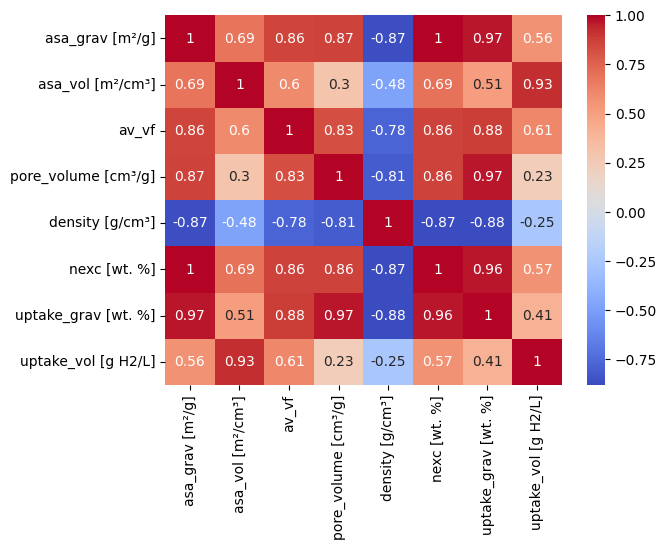

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
df.shape
df.head()

,asa_grav [m²/g],asa_vol [m²/cm³],av_vf,pore_volume [cm³/g],density [g/cm³],nexc [wt. %],uptake_grav [wt. %],uptake_vol [g H2/L],metal1
0,1731.39,1649.81,0.62,0.65,0.95,3.49,4.47,44.62,Al
1,736.35,1129.32,0.48,0.31,1.53,2.19,2.58,40.64,Cu
2,2054.35,1714.96,0.64,0.77,0.83,3.91,5.11,44.96,Cu
3,4728.27,1989.54,0.82,1.95,0.42,7.22,10.55,49.61,Ni
4,2623.65,1989.66,0.76,1.00,0.76,4.63,6.26,50.68,Mn


In [ ]:
X= df.iloc[:, [0,3]].values
y= df.iloc[:, -3].values
print(X)
print(y)

[[1.73139e+03 6.50000e-01]
 [7.36350e+02 3.10000e-01]
 [2.05435e+03 7.70000e-01]
 ...
 [7.15380e+02 3.50000e-01]
 [8.25530e+02 3.90000e-01]
 [3.05286e+03 8.20000e-01]]
[4.47 2.58 5.11 ... 2.64 2.87 6.15]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


Multiple linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)


In [ ]:
X_train[:,0]
X_train

array([[1.13e+03, 3.00e-01],
       [3.44e+03, 8.20e-01],
       [2.41e+03, 7.00e-01],
       ...,
       [2.54e+03, 7.10e-01],
       [7.66e+02, 3.60e-01],
       [3.82e+03, 2.73e+00]])

In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[4.71 4.78]
 [4.06 4.06]
 [6.76 6.78]
 ...
 [3.54 3.5 ]
 [7.08 7.24]
 [3.47 3.45]]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9992544405694145

In [ ]:
X_train[:, 0]

array([1131.76, 3436.94, 2405.35, ..., 2538.91,  765.95, 3824.31])

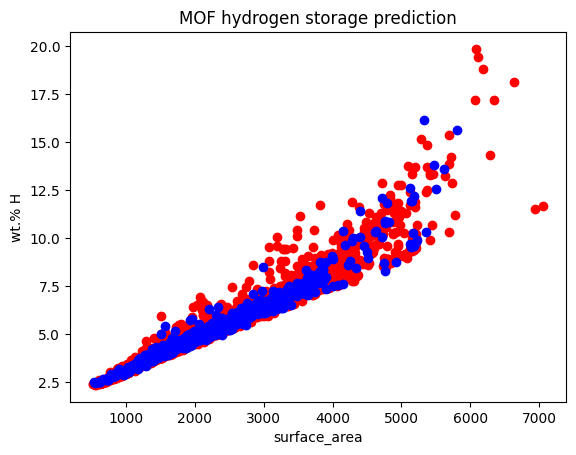

In [ ]:
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.scatter(X_test[:,0], regressor.predict(X_test), color = 'blue')
plt.xlabel('surface_area')
plt.ylabel('wt.% H')
plt.title('MOF hydrogen storage prediction')
plt.show()

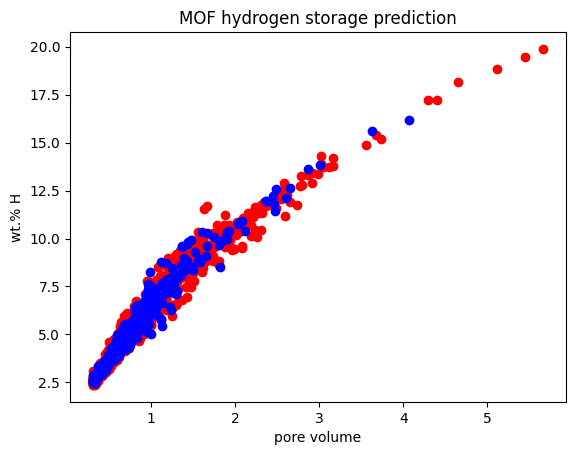

In [ ]:
plt.scatter(X_train[:, 1], y_train, color = 'red')
plt.scatter(X_test[:, 1], regressor.predict(X_test), color = 'blue')
plt.xlabel('pore volume')
plt.ylabel('wt.% H')
plt.title('MOF hydrogen storage prediction')

plt.show()

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[1.00e-03 2.38e+00]
1.1660658906394747


Therefore, the equation of our simple linear regression model is:

wt. % H = (1.00e-03 × X1) + (2.38e+00 × X2) + 26816.19


Where, X1 is the surface area in m2/g

and X2 is the pore volume in cm3/g